# Machine Learning Models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import normalize, StandardScaler

In [2]:
df_train = pd.read_csv("dataset/output/no-oversampling/train.csv")
df_test = pd.read_csv("dataset/output/test.csv")

In [3]:
# split into X_train, y_train, X_test, y_test
X_train = df_train.drop(columns=["target"])
y_train = df_train["target"]
X_test = df_test.drop(columns=["target"])
y_test = df_test["target"]

# normalize data
X_train = normalize(X_train)
X_test = normalize(X_test)

In [4]:
# helper function to draw learning curve in sns plot
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    ylim=None,
    cv=None,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    plt.figure(figsize=(5, 3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-",
             color="r", label="Training score")
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    plt.show()

In [6]:
# hide warnings
import warnings

warnings.filterwarnings("ignore")

## Support Vector Machine (SVM)


Accuracy:  0.6449598572702944
Confusion Matrix: 
 [[1446    0]
 [ 796    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1446
           1       0.00      0.00      0.00       796

    accuracy                           0.64      2242
   macro avg       0.32      0.50      0.39      2242
weighted avg       0.42      0.64      0.51      2242



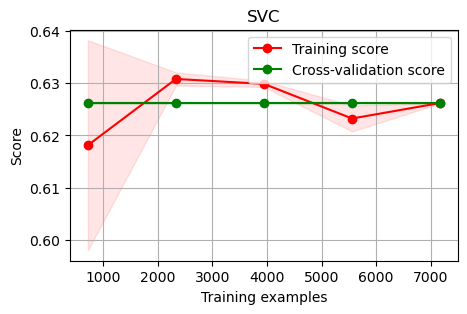

In [7]:
model = SVC(kernel="rbf", random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

plot_learning_curve(model, "SVC", X_train, y_train, cv=5)

## Decision Tree


Accuracy:  0.4504906333630687
Confusion Matrix: 
 [[839 607]
 [625 171]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.58      0.58      1446
           1       0.22      0.21      0.22       796

    accuracy                           0.45      2242
   macro avg       0.40      0.40      0.40      2242
weighted avg       0.45      0.45      0.45      2242



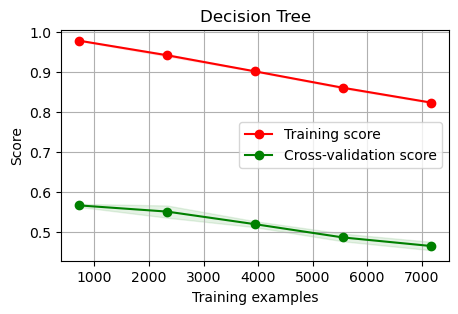

In [8]:
model = DecisionTreeClassifier(
    criterion="entropy", splitter="best", random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

plot_learning_curve(model, "Decision Tree", X_train, y_train, cv=5)

## Logistic Regression


Accuracy: 0.6543264942016057
Confusion Matrix: 
 [[1425   21]
 [ 754   42]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.99      0.79      1446
           1       0.67      0.05      0.10       796

    accuracy                           0.65      2242
   macro avg       0.66      0.52      0.44      2242
weighted avg       0.66      0.65      0.54      2242



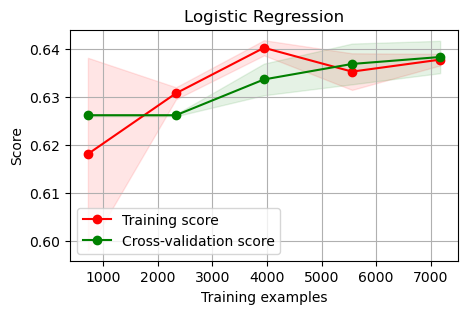

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "Logistic Regression", X_train, y_train, cv=5)

## Random Forest


Accuracy: 0.6793041926851026
Confusion Matrix: 
 [[1357   89]
 [ 630  166]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.94      0.79      1446
           1       0.65      0.21      0.32       796

    accuracy                           0.68      2242
   macro avg       0.67      0.57      0.55      2242
weighted avg       0.67      0.68      0.62      2242



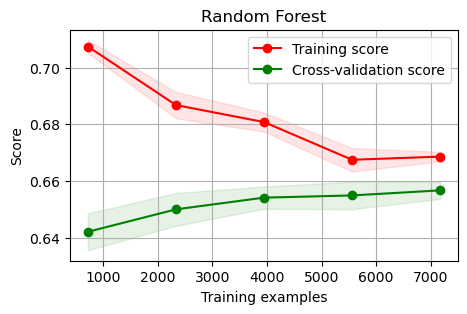

In [10]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "Random Forest", X_train, y_train, cv=5)

## AdaBoost


Accuracy: 0.6913470115967886
Confusion Matrix: 
 [[1333  113]
 [ 579  217]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.92      0.79      1446
           1       0.66      0.27      0.39       796

    accuracy                           0.69      2242
   macro avg       0.68      0.60      0.59      2242
weighted avg       0.68      0.69      0.65      2242



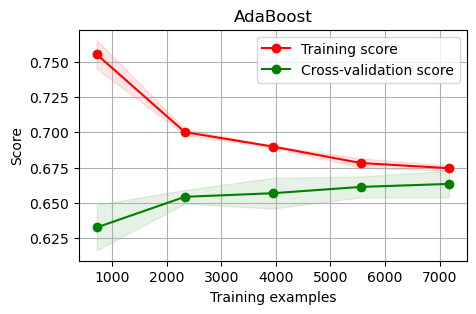

In [11]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "AdaBoost", X_train, y_train, cv=5)

## GradientBoosting


Accuracy: 0.7002676181980375
Confusion Matrix: 
 [[1342  104]
 [ 568  228]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.93      0.80      1446
           1       0.69      0.29      0.40       796

    accuracy                           0.70      2242
   macro avg       0.69      0.61      0.60      2242
weighted avg       0.70      0.70      0.66      2242



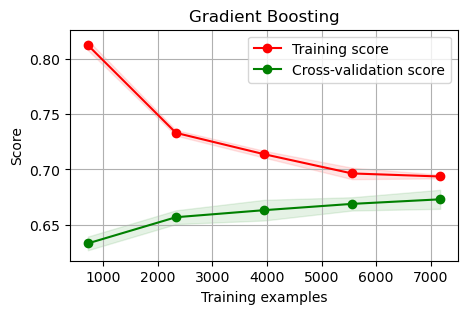

In [12]:
from sklearn.metrics import roc_auc_score

model = GradientBoostingClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "Gradient Boosting", X_train, y_train, cv=5)